# Compare predictions

In this notebook we want to compare predictions of different models. Since the type of predictions are different, first we convert them to survival functions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
test = pd.read_csv('../../data/main_process_preprocessed_data_test.csv')
test.index = test.id

predictions_drsa = pd.read_csv('../../data/full_predictions_drsa.csv')
predictions_deephit = pd.read_csv('../../data/full_predictions_deephit.csv')
predictions_cox = pd.read_csv('../../data/full_predictions_cox.csv')

year_max_drsa = 20
year_max_deephit = 10
year_max_cox = 7

In [3]:
predictions_drsa.shape

(1362, 244)

## Convert predictions to survivorship

We want to compute the survival function $S(t) = P(T>t) = 1 - P(T \leq t)$, being $T$ the survival time. 

Since in **DRSA** we have a discrete time and predictions for $h(t) = P(T=t|T>t-1)$  and since

$P(T > t) = P(T \neq 0,..., T \neq t) = \prod_{k\leq t} P(T \neq k| T > k-1) = \prod_{k\leq t} (1 - P(T = k| T > k-1))$

we have that $S(t) = \prod_{k\leq t} (1 - h(k))$.

In [4]:
predictions_drsa.index = predictions_drsa.id
predictions_drsa = predictions_drsa.drop(columns = 'id')
# convert to survivorship
surv_drsa = (1-predictions_drsa).cumprod(axis = 1)

surv_drsa.head()

,0,1,2,3,4,5,6,7,8,9,...,233,234,235,236,237,238,239,240,241,242
id,,,,,,,,,,,,,,,,,,,,,
10013995,0.709712,0.594057,0.522041,0.460889,0.404313,0.351994,0.304470,0.262031,0.224622,0.191960,...,8.112164e-26,5.995676e-26,4.431068e-26,3.274522e-26,2.419674e-26,1.787867e-26,1.320942e-26,9.758932e-27,7.209269e-27,5.325382e-27
10026243,0.709763,0.611872,0.560447,0.518564,0.479120,0.441243,0.405114,0.370987,0.339021,0.309275,...,2.407553e-20,1.803788e-20,1.351208e-20,1.012017e-20,7.578491e-21,5.674254e-21,4.247827e-21,3.179492e-21,2.379484e-21,1.780503e-21
10039319,0.716839,0.619845,0.565533,0.519774,0.476444,0.435046,0.395903,0.359282,0.325302,0.293965,...,1.058736e-21,7.920389e-22,5.924347e-22,4.430686e-22,3.313135e-22,2.477115e-22,1.851798e-22,1.384147e-22,1.034459e-22,7.730147e-23
10043504,0.713824,0.608126,0.544946,0.490987,0.440278,0.392554,0.348315,0.307881,0.271319,0.238518,...,7.556850e-24,5.610768e-24,4.165480e-24,3.092213e-24,2.295282e-24,1.703591e-24,1.264321e-24,9.382381e-25,6.961975e-25,5.165543e-25
10044738,0.726880,0.643618,0.602695,0.569677,0.538231,0.507468,0.477405,0.448178,0.419912,0.392700,...,1.234727e-18,9.365401e-19,7.099212e-19,5.378200e-19,4.072121e-19,3.081590e-19,2.330837e-19,1.762155e-19,1.331626e-19,1.005859e-19


Instead, in **DEEPHIT** we have predictions for $f(t) = P(T=t)$. Then we can easily find

$S(t) = P(T >t) = 1 - P(T \leq t) =  1 - \sum_{k\leq t} P(T = k) = 1 - \sum_{k\leq t} f(k)$

In [5]:
predictions_deephit.index = predictions_drsa.index
surv_deephit = 1- predictions_deephit.cumsum(axis = 1)
surv_deephit.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
id,,,,,,,,,,,,,,,,,,,,,
10013995,0.983587,0.968989,0.950905,0.932714,0.917829,0.899328,0.881547,0.866519,0.850342,0.831773,...,0.153142,0.136107,0.119163,0.101617,0.084869,0.067774,0.050336,0.033565,0.016829,-2.400000e-08
10026243,0.993977,0.987422,0.977602,0.970277,0.959865,0.950992,0.939714,0.929318,0.919400,0.909685,...,0.233661,0.207745,0.181127,0.153687,0.128596,0.102809,0.076360,0.051582,0.026004,5.820000e-08
10039319,0.993285,0.987006,0.978084,0.970286,0.960447,0.952105,0.941616,0.931679,0.922747,0.913126,...,0.233494,0.207494,0.180945,0.153143,0.127888,0.102052,0.075384,0.051070,0.025463,-3.400000e-09
10043504,0.990916,0.982593,0.971458,0.961153,0.950000,0.938939,0.926578,0.915409,0.904552,0.892313,...,0.210144,0.186947,0.163149,0.138385,0.115584,0.092334,0.068372,0.046178,0.023173,-5.600000e-09
10044738,0.995627,0.991055,0.983734,0.978275,0.969584,0.963506,0.954490,0.945624,0.938193,0.931104,...,0.258206,0.229473,0.200252,0.169671,0.141808,0.113116,0.083661,0.056728,0.028345,-4.220000e-08


For the **COX** model we already built survivorship predictions (but on a much more refined time grid).

In [6]:
predictions_cox = predictions_cox.transpose()
predictions_cox.index = predictions_drsa.index

surv_cox = predictions_cox
surv_cox.head()

,0,1,2,3,4,5,6,7,8,9,...,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587
id,,,,,,,,,,,,,,,,,,,,,
10013995,0.999282,0.999282,0.999282,0.999282,0.999282,0.998923,0.998203,0.998203,0.997844,0.997124,...,0.454487,0.454487,0.454487,0.454487,0.454487,0.454487,0.454487,0.454487,0.454487,0.454487
10026243,0.999866,0.999866,0.999866,0.999866,0.999866,0.999799,0.999664,0.999664,0.999597,0.999463,...,0.863132,0.863132,0.863132,0.863132,0.863132,0.863132,0.863132,0.863132,0.863132,0.863132
10039319,0.999879,0.999879,0.999879,0.999879,0.999879,0.999818,0.999696,0.999696,0.999635,0.999513,...,0.875155,0.875155,0.875155,0.875155,0.875155,0.875155,0.875155,0.875155,0.875155,0.875155
10043504,0.999665,0.999665,0.999665,0.999665,0.999665,0.999498,0.999162,0.999162,0.998994,0.998658,...,0.692370,0.692370,0.692370,0.692370,0.692370,0.692370,0.692370,0.692370,0.692370,0.692370
10044738,0.999953,0.999953,0.999953,0.999953,0.999953,0.999930,0.999883,0.999883,0.999859,0.999812,...,0.949800,0.949800,0.949800,0.949800,0.949800,0.949800,0.949800,0.949800,0.949800,0.949800


# Plot sample of patients

In [7]:
# set time for plots
drsa_time = np.arange(1,len(predictions_drsa.columns)+1)/len(predictions_drsa.columns)*year_max_drsa
deephit_time = np.arange(1,len(predictions_deephit.columns)+1)/len(predictions_deephit.columns)*year_max_deephit
cox_time = predictions_cox.columns/len(predictions_cox.columns)*year_max_cox

## observe non proportionality in DRSA

In [8]:
sample_ids = np.random.choice(test.id, size = 100, replace = False)
time_threshold = 5

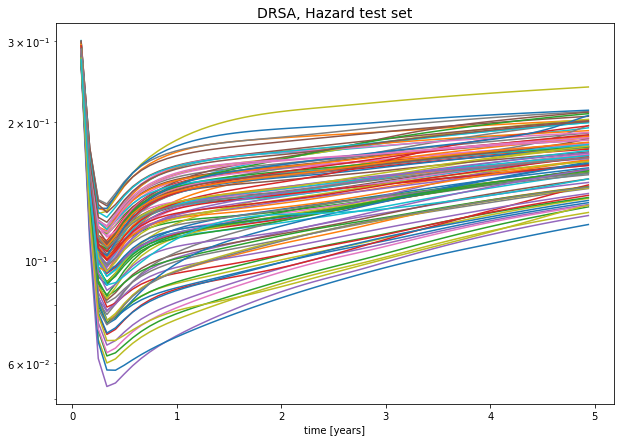

In [9]:

time_threshold = 5
time_min = 0

# DRSA - Hazard
plt.figure(figsize = (10,7))
for i in sample_ids:
    plt.plot(drsa_time[(drsa_time >= time_min) & (drsa_time < time_threshold)],predictions_drsa.loc[i,:][(drsa_time >= time_min) & (drsa_time < time_threshold)],
             alpha = 1,
            )
    
plt.xlabel('time [years]')
plt.title('DRSA, Hazard test set',size = 14)
plt.yscale('log')
plt.show()

In [10]:
sample_ids = np.random.choice(test.id, size = 500, replace = False)
time_threshold = 5

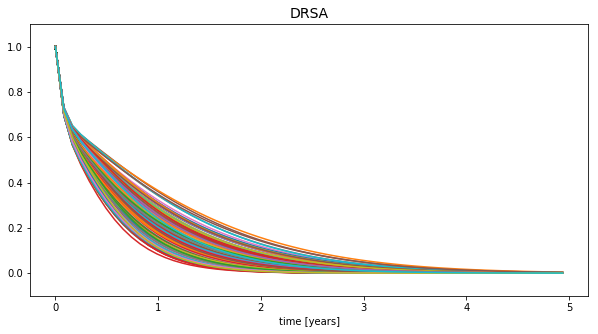

In [11]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]))
plt.xlabel('time [years]')
plt.title('DRSA',size = 14)
plt.ylim(-0.1,1.1)
plt.show()

We plot DRSA survivorship in log scale

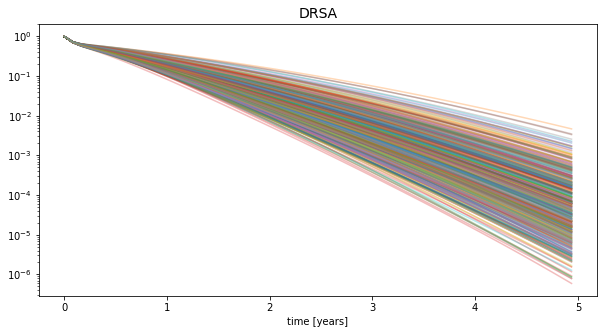

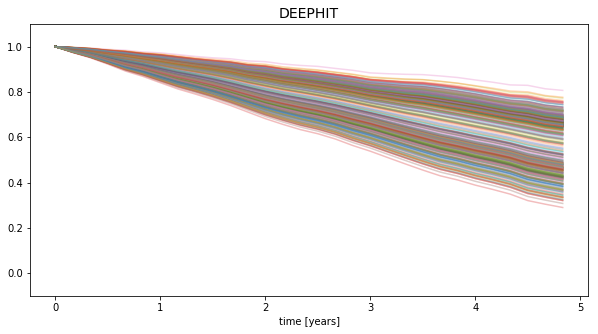

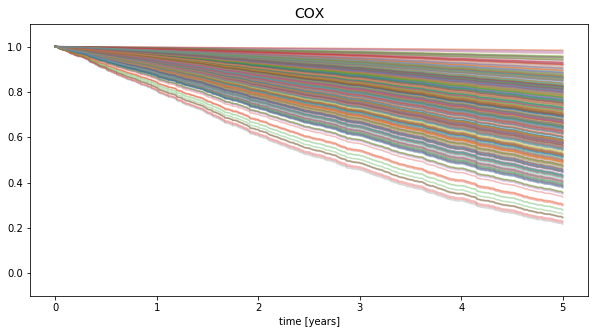

In [12]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]),alpha = 0.3)
plt.xlabel('time [years]')
plt.title('DRSA',size = 14)
plt.yscale('log')
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(deephit_time[deephit_time < time_threshold]),[1]+list(surv_deephit.loc[i,:][deephit_time < time_threshold]),alpha = 0.3)
plt.xlabel('time [years]')
plt.title('DEEPHIT',size = 14)
plt.ylim(-0.1,1.1)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold],alpha = 0.3)
plt.xlabel('time [years]')
plt.title('COX',size = 14)
plt.ylim(-0.1,1.1)
plt.show()

Let's compare the original predictions on the same sample

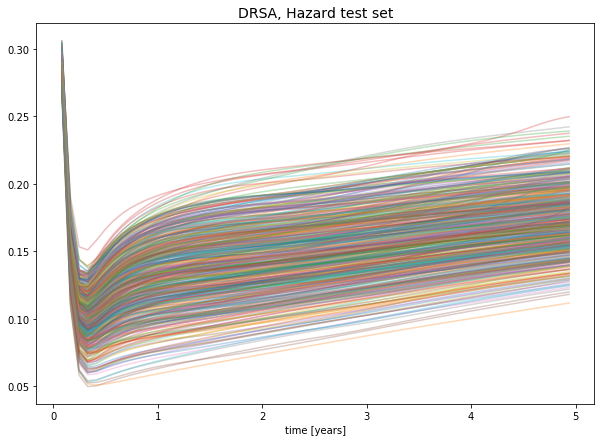

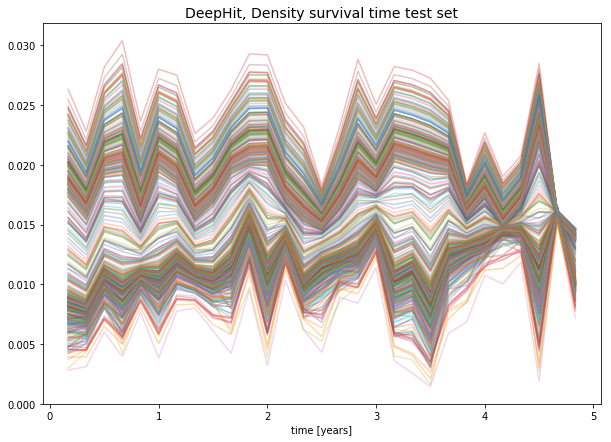

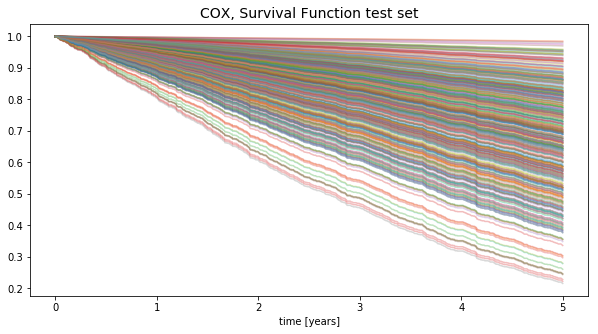

In [13]:
# DRSA
plt.figure(figsize = (10,7))
for i in sample_ids:
    plt.plot(drsa_time[drsa_time < time_threshold],predictions_drsa.loc[i,:][drsa_time < time_threshold],alpha = 0.3)
    
plt.xlabel('time [years]')
plt.title('DRSA, Hazard test set',size = 14)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,7))
for i in sample_ids:
    plt.plot(deephit_time[deephit_time < time_threshold],predictions_deephit.loc[i,:][deephit_time < time_threshold],alpha = 0.3)
    
plt.xlabel('time [years]')
plt.title('DeepHit, Density survival time test set',size = 14)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold],alpha = 0.3)
plt.xlabel('time [years]')
plt.title('COX, Survival Function test set',size = 14)
plt.show()

# Males vs Females

In [14]:
colors = ['fuchsia','dodgerblue']
col = {'F':colors[0],'M':colors[1]}

# for legend
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-') for c in colors]
labels = ['Females', 'Males']

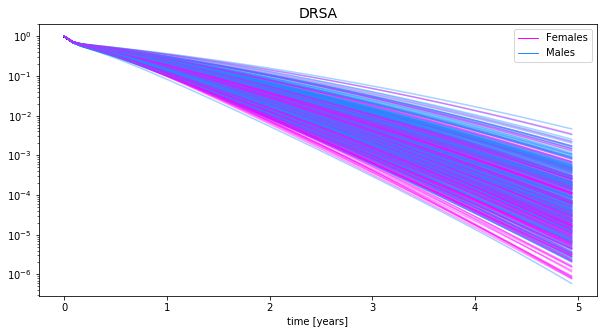

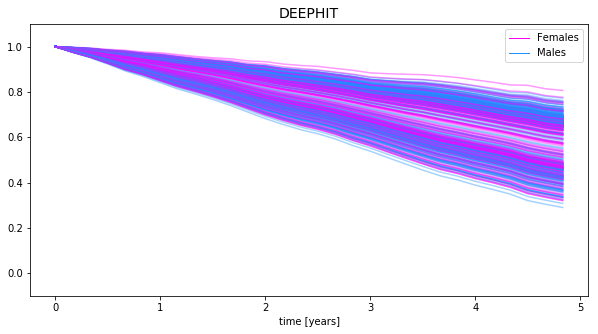

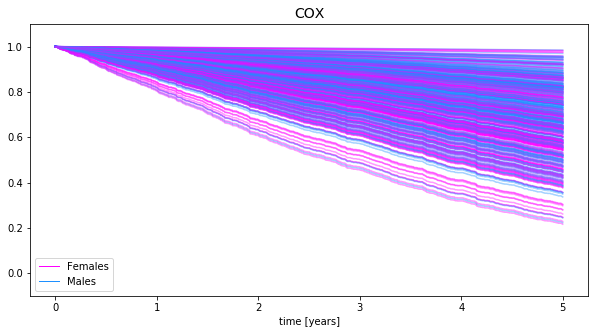

In [15]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]), 
             color = col[test.loc[i,'sex']],
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DRSA',size = 14)
plt.yscale('log')
plt.legend(lines, labels)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(deephit_time[deephit_time < time_threshold]),[1]+list(surv_deephit.loc[i,:][deephit_time < time_threshold]), 
             color = col[test.loc[i,'sex']],
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DEEPHIT',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold], 
             color = col[test.loc[i,'sex']],
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('COX',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# Age

In [16]:
def col(x):
    return 'blue' if x <75 else 'red'

colors = ['blue','red']
# for legend
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-') for c in colors]
labels = ['Under 75', 'Over 75']

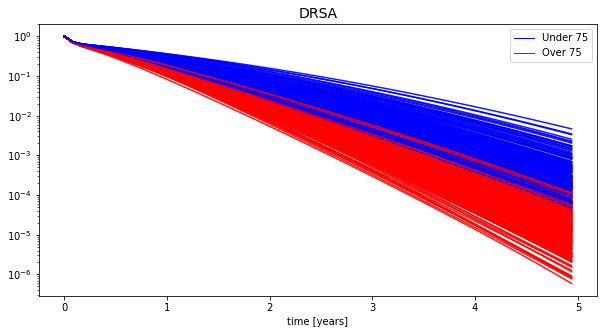

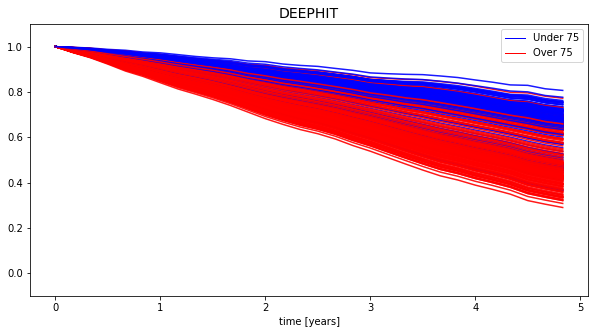

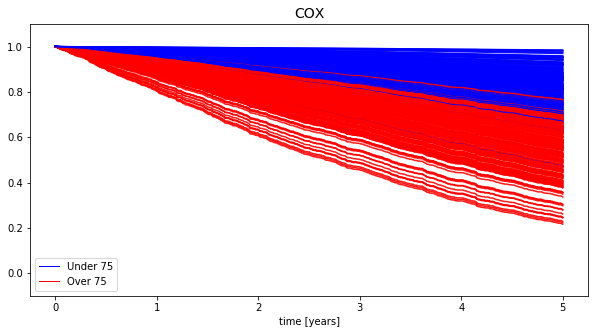

In [17]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]), 
             color = col(test.loc[i,'age_in']),
             alpha = 0.9,
            )
plt.xlabel('time [years]')
plt.title('DRSA',size = 14)
plt.yscale('log')
plt.legend(lines, labels)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(deephit_time[deephit_time < time_threshold]),[1]+list(surv_deephit.loc[i,:][deephit_time < time_threshold]), 
             color = col(test.loc[i,'age_in']),
             alpha = 0.9,
            )
plt.xlabel('time [years]')
plt.title('DEEPHIT',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold], 
             color = col(test.loc[i,'age_in']),
             alpha = 0.9,
            )
plt.xlabel('time [years]')
plt.title('COX',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# More cases

In [18]:
def col(x):
    if x['sex'] == 'F' and x['age_in'] > 75:
        return 'fuchsia'
    elif x['sex'] == 'F' and x['age_in'] < 75:
        return 'red'
    elif x['sex'] == 'M' and x['age_in'] > 75:
        return 'blue'
    else:
        return 'aqua'

colors = ['fuchsia','red','blue','aqua']
# for legend
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-') for c in colors]
labels = ['Female Over 75', 'Female Under 75', 'Male Over 75', 'Male Under 75']

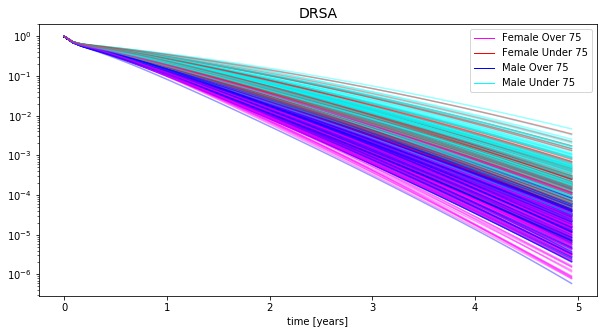

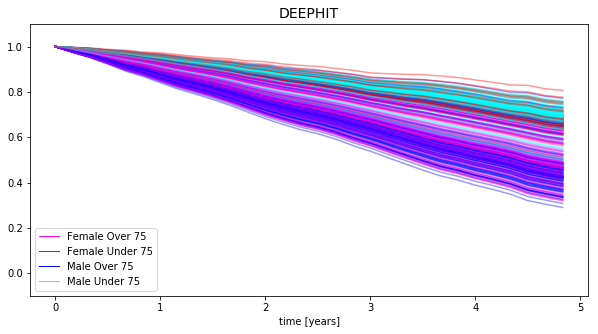

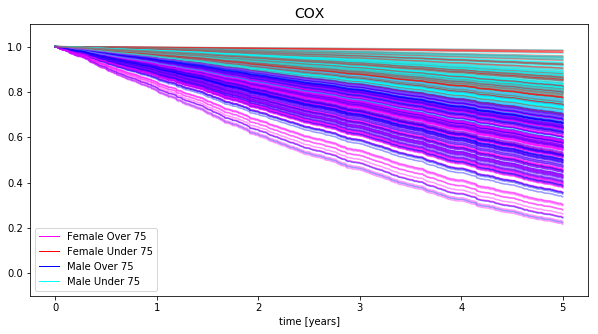

In [19]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DRSA',size = 14)
plt.yscale('log')
plt.legend(lines, labels)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(deephit_time[deephit_time < time_threshold]),[1]+list(surv_deephit.loc[i,:][deephit_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DEEPHIT',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold], 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('COX',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

In [20]:
def col(x):
    return 'red' if x['sex'] == 'F' and x['age_in'] > 75 else 'grey'

colors = ['red']
# for legend
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-') for c in colors]
labels = ['Female Over 75']

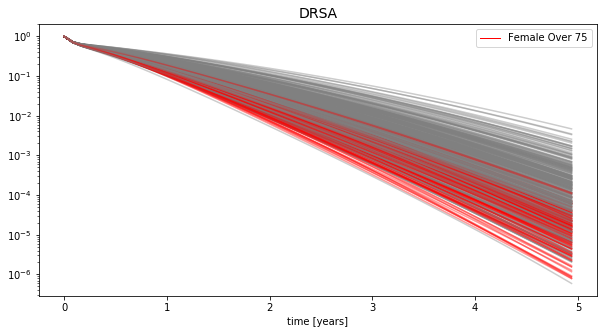

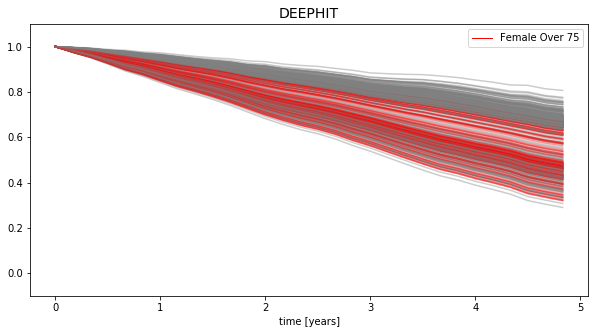

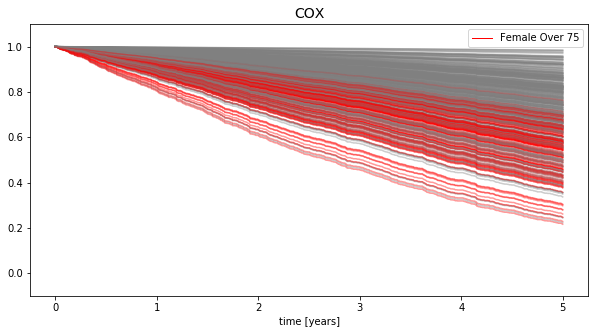

In [21]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DRSA',size = 14)
plt.yscale('log')
plt.legend(lines, labels)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(deephit_time[deephit_time < time_threshold]),[1]+list(surv_deephit.loc[i,:][deephit_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DEEPHIT',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold], 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('COX',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

In [22]:
def col(x):
    return 'red' if x['sex'] == 'F' and x['age_in'] <= 75 else 'grey'

colors = ['red']
# for legend
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-') for c in colors]
labels = ['Female Under 75']

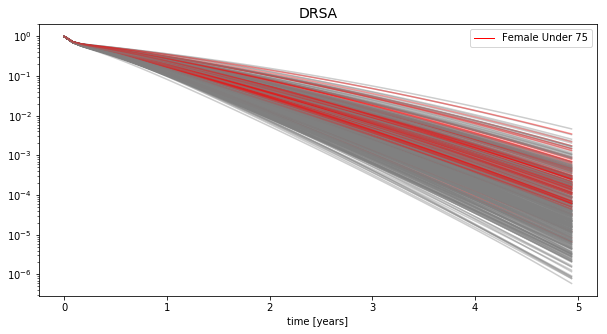

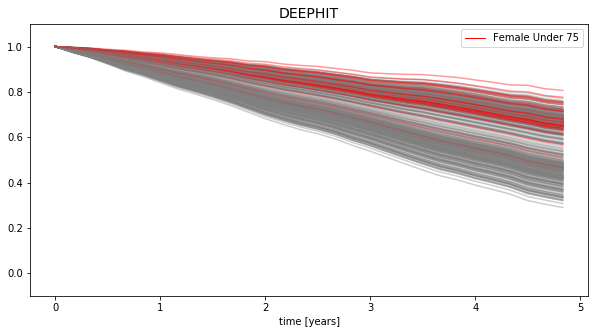

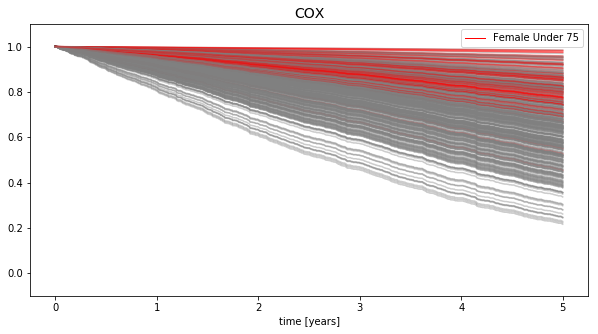

In [23]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DRSA',size = 14)
plt.yscale('log')
plt.legend(lines, labels)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(deephit_time[deephit_time < time_threshold]),[1]+list(surv_deephit.loc[i,:][deephit_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DEEPHIT',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold], 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('COX',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

In [24]:
def col(x):
    return 'red' if x['sex'] == 'M' and x['age_in'] > 75 else 'grey'

colors = ['red']
# for legend
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-') for c in colors]
labels = ['Male Over 75']

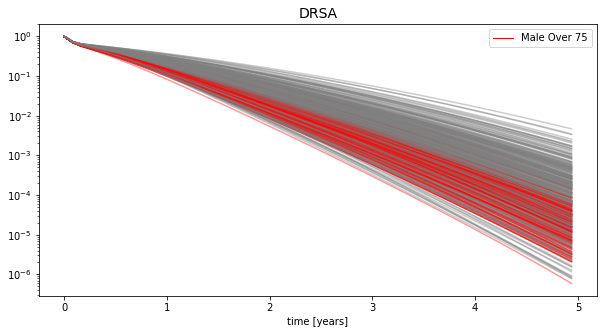

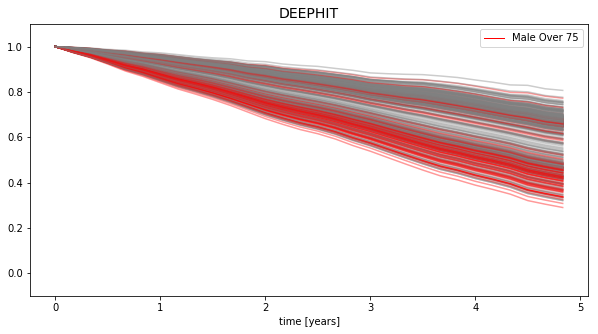

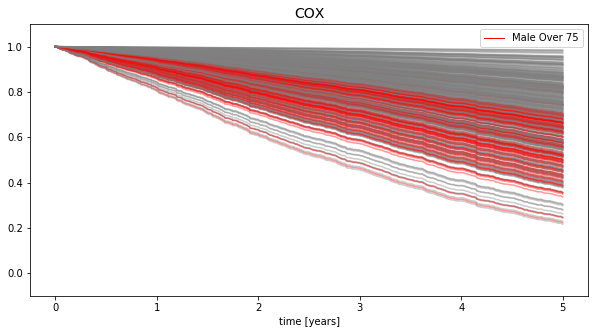

In [25]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DRSA',size = 14)
plt.yscale('log')
plt.legend(lines, labels)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(deephit_time[deephit_time < time_threshold]),[1]+list(surv_deephit.loc[i,:][deephit_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DEEPHIT',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold], 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('COX',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

In [26]:
def col(x):
    return 'red' if x['sex'] == 'M' and x['age_in'] <= 75 else 'grey'

colors = ['red']
# for legend
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-') for c in colors]
labels = ['Male Under 75']

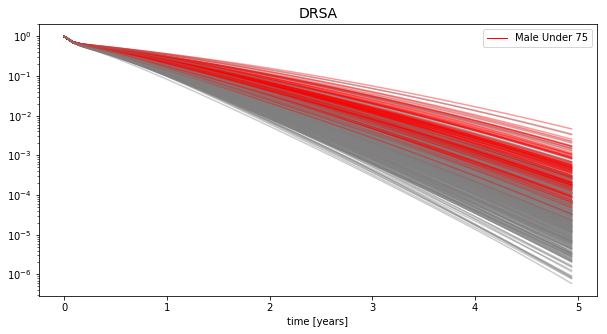

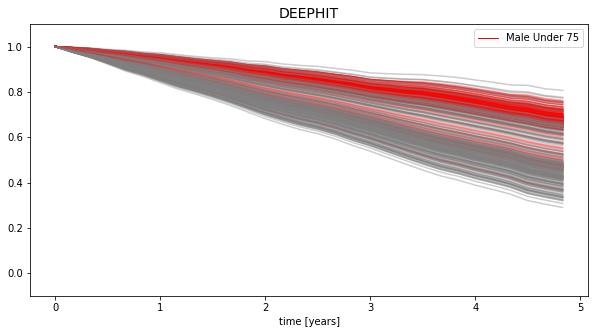

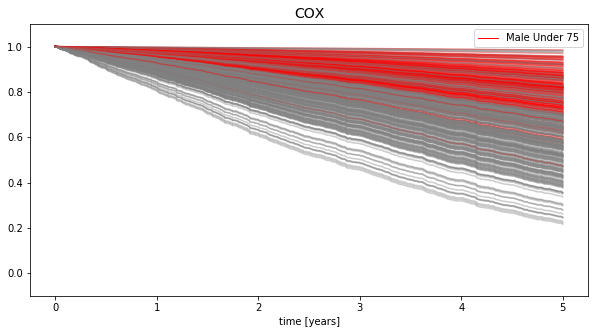

In [27]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DRSA',size = 14)
plt.yscale('log')
plt.legend(lines, labels)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(deephit_time[deephit_time < time_threshold]),[1]+list(surv_deephit.loc[i,:][deephit_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DEEPHIT',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold], 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('COX',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

In [28]:
def col(x):
    return 'red' if x['ACE_PC1'] > 0 else 'grey'

colors = ['red']
# for legend
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-') for c in colors]
labels = ['Positive ACE_PC1']

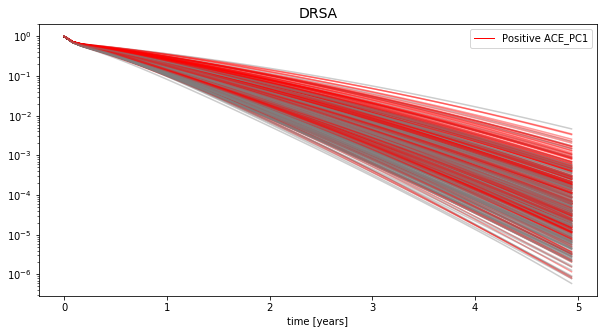

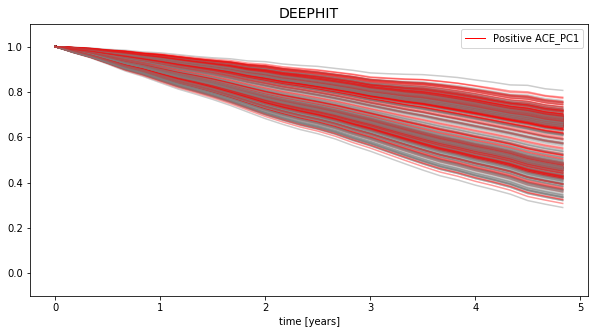

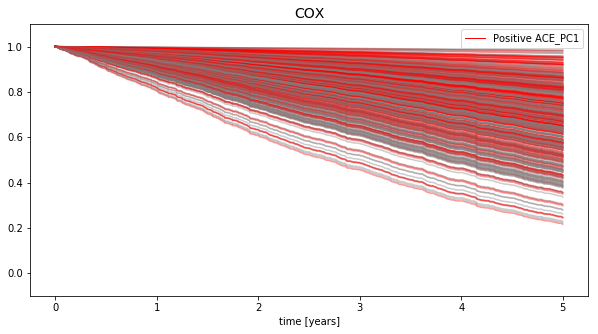

In [29]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DRSA',size = 14)
plt.yscale('log')
plt.legend(lines, labels)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(deephit_time[deephit_time < time_threshold]),[1]+list(surv_deephit.loc[i,:][deephit_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DEEPHIT',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold], 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('COX',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()